In [ ]:
! pip3 install transformers


In [ ]:
%cd /content/drive/MyDrive/Bert & Distil_BERT

/content/drive/MyDrive/Bert & Distil_BERT


## Distil BERT

In [ ]:
## for data
import pandas as pd
import numpy as np
from sklearn import metrics, manifold
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical

#####
from run_Distil_Bert_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

In [ ]:
data_path = "/content/drive/MyDrive/Bert & Distil_BERT/data"
train_df = pd.read_csv(os.path.join(data_path,"train.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"dev.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"test.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/MyDrive/Bert & Distil_BERT/output/Distil_BERT"

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=3,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result) 

In [ ]:
predicted_prob=[]
for i, j in zip(test_result.prob_0,test_result.prob_1):
  predicted_prob.append((i,j))
predicted_prob=np.array(predicted_prob)
predicted_prob_max= np.amax(predicted_prob, axis=1)

In [ ]:
y_test =np.array(test_df.similarity)
classes =np.array([0,1])
predicted=test_result.prediction

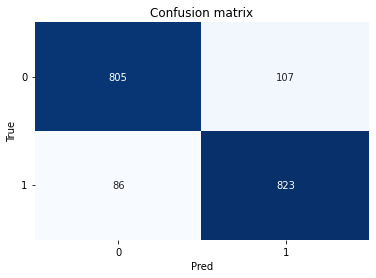

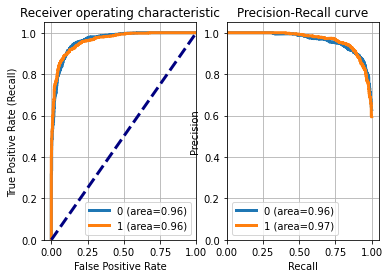

In [ ]:
# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
fig, ax = plt.subplots(nrows=1, ncols=2)

##################
y_test_cat = to_categorical(y_test, num_classes=2)

# Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_cat[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
#################
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_cat[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

## BERT

In [ ]:
from run_Bert_model import model_train_validate_test

data_path = "/content/drive/MyDrive/Bert & Distil_BERT/data"
train_df = pd.read_csv(os.path.join(data_path,"train.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"dev.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"test.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/MyDrive/Bert & Distil_BERT/output/BERT"

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=3,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result) 

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

====================  Preparing for training  ====================
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,



* Validation loss before training: 0.3776, accuracy: 89.5642%, auc: 0.9547

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:



Avg. batch proc. time: 0.2657s, loss: 0.1119: 100%|██████████| 217/217 [01:03<00:00,  3.44it/s]


-> Training time: 63.1706s, loss = 0.1119, accuracy: 95.9827%
* Validation for epoch 1:
-> Valid. time: 2.3623s, loss: 0.2812, accuracy: 91.2844%, auc: 0.9701

save model succesfully!

* Test for epoch 1:
Test accuracy: 0.9204%

* Training epoch 2:



Avg. batch proc. time: 0.2674s, loss: 0.0451: 100%|██████████| 217/217 [01:04<00:00,  3.38it/s]


-> Training time: 64.3096s, loss = 0.0451, accuracy: 98.5694%
* Validation for epoch 2:
-> Valid. time: 2.3696s, loss: 0.3958, accuracy: 90.1376%, auc: 0.9689

-> Early stopping: patience limit reached, stopping...
Accuracy: 92.0%
Precision: 92.2%
Recall: 92.0%
F1: 92.0%
AUC: 0.74
classification_report:

              precision    recall  f1-score   support

     class_0      0.944     0.894     0.918       912
     class_1      0.899     0.947     0.922       909

    accuracy                          0.920      1821
   macro avg      0.922     0.920     0.920      1821
weighted avg      0.922     0.920     0.920      1821



In [ ]:
predicted_prob=[]
for i, j in zip(test_result.prob_0,test_result.prob_1):
  predicted_prob.append((i,j))
predicted_prob=np.array(predicted_prob)
predicted_prob_max= np.amax(predicted_prob, axis=1)

In [ ]:
y_test =np.array(test_df.similarity)
classes =np.array([0,1])
predicted=test_result.prediction

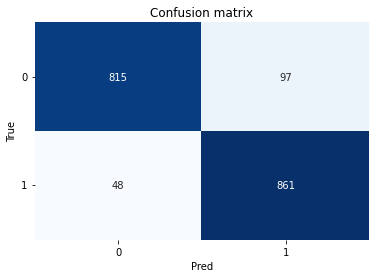

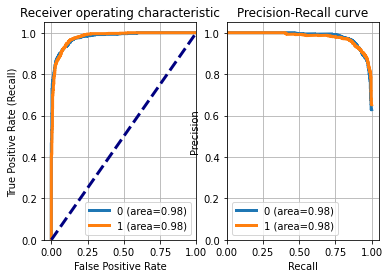

In [ ]:
# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
fig, ax = plt.subplots(nrows=1, ncols=2)

##################
y_test_cat = to_categorical(y_test, num_classes=2)
predicted_prob
# Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_cat[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
#################
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_cat[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

Resources: 

1. https://towardsdatascience.com/text-classification-with-no-model-training-935fe0e42180

2. https://github.com/YJiangcm/SST-2-sentiment-analysis